In [1]:
import pandas as pd
import math, datetime
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import pandas_datareader.data as web

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Determine date time

In [2]:
start = datetime.datetime(2011,1,1)
end   = datetime.datetime(2021,5,29)

# Determine company name code

In [3]:
Company = 'TLKM.JK'

In [4]:
df = web.DataReader(Company, data_source='yahoo', start=start, end=end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2011-01-03,1610.0,1580.0,1600.0,1600.0,34922500.0,1281.690918
2011-01-04,1600.0,1580.0,1580.0,1580.0,50385000.0,1265.669678
2011-01-05,1600.0,1580.0,1600.0,1600.0,84900000.0,1281.690918
2011-01-06,1590.0,1530.0,1540.0,1540.0,198480000.0,1233.627686
2011-01-07,1520.0,1450.0,1470.0,1470.0,284375000.0,1177.553589


In [5]:
df.dtypes

High         float64
Low          float64
Open         float64
Close        float64
Volume       float64
Adj Close    float64
dtype: object

In [6]:
df.isnull().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

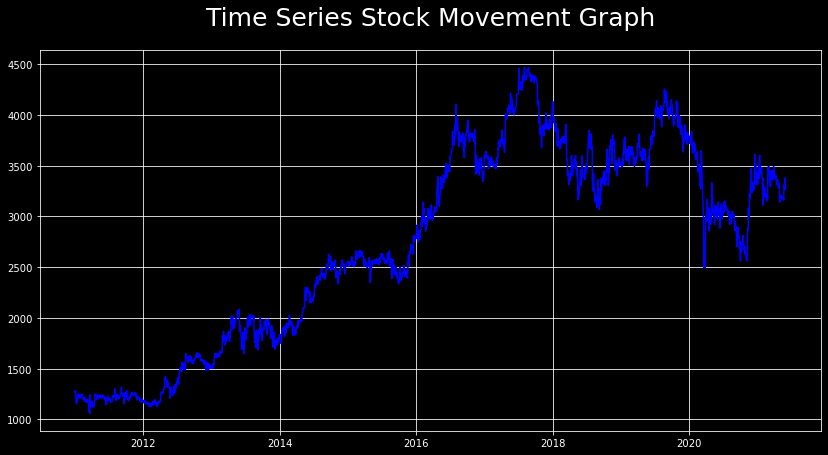

In [7]:
plt.figure(figsize=(14,7))
plt.plot(df['Adj Close'], color='b')
plt.title('Time Series Stock Movement Graph', fontsize=25, loc='center', y=1.05)
plt.grid()
plt.show()

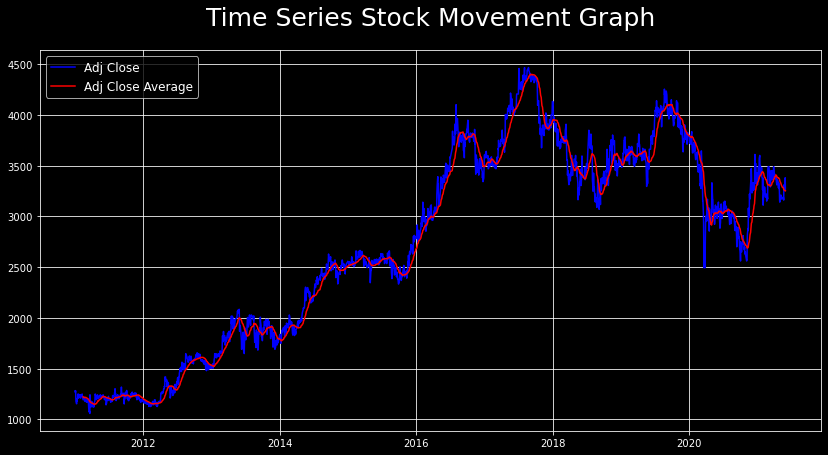

In [8]:
plt.figure(figsize=(14,7))
adj_close = df['Adj Close']
average_30 = adj_close.rolling(window=30).mean()

plt.plot(adj_close, color='b')
plt.plot(average_30, color='r')

plt.title('Time Series Stock Movement Graph', fontsize=25, loc='center', y=1.05)
plt.legend(['Adj Close', 'Adj Close Average'], loc=0, prop={'size' : 12})
plt.grid()
plt.show()

# Machine Learning

In [9]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-05-21,3350.0,3270.0,3340.0,3270.0,104101400.0,3270.0
2021-05-24,3330.0,3220.0,3290.0,3260.0,64347100.0,3260.0
2021-05-25,3320.0,3270.0,3290.0,3300.0,62218300.0,3300.0
2021-05-27,3400.0,3330.0,3350.0,3380.0,233551300.0,3380.0
2021-05-28,3400.0,3260.0,3380.0,3270.0,87439800.0,3270.0


In [10]:
# Take the colomns needed

df = df[['Volume', 'Adj Close']]
df.tail()

,Volume,Adj Close
Date,,
2021-05-21,104101400.0,3270.0
2021-05-24,64347100.0,3260.0
2021-05-25,62218300.0,3300.0
2021-05-27,233551300.0,3380.0
2021-05-28,87439800.0,3270.0


In [11]:
df.describe()

,Volume,Adj Close
count,2.584000e+03,2584.000000
mean,9.572705e+07,2741.563381
std,5.867595e+07,975.022011
min,0.000000e+00,1057.394897
25%,5.973980e+07,1859.054810
50%,8.378430e+07,2877.454102
75%,1.167104e+08,3577.831299
max,6.241426e+08,4465.643555


### Determine Forecast Days

In [12]:
forecast_time = 180

In [13]:
df['Label Forecast'] = df['Adj Close'].shift(-forecast_time, axis=0)

In [14]:
df.tail(15)

,Volume,Adj Close,Label Forecast
Date,,,
2021-05-04,60180600.0,3210.0,NaN
2021-05-05,76480300.0,3200.0,NaN
2021-05-06,91955600.0,3190.0,NaN
2021-05-07,98099900.0,3190.0,NaN
2021-05-10,104121900.0,3170.0,NaN
2021-05-11,94281900.0,3180.0,NaN
2021-05-17,114071400.0,3190.0,NaN
2021-05-18,77310400.0,3180.0,NaN
2021-05-19,48958100.0,3160.0,NaN


### Training the data

In [15]:
X = np.array(df.drop(['Label Forecast'], 1))[:-forecast_time]
X

array([[3.49225000e+07, 1.28169092e+03],
       [5.03850000e+07, 1.26566968e+03],
       [8.49000000e+07, 1.28169092e+03],
       ...,
       [1.22465300e+08, 3.02000000e+03],
       [1.02787800e+08, 2.99000000e+03],
       [1.60569500e+08, 2.96000000e+03]])

In [16]:
y = np.array(df['Label Forecast'])[:-forecast_time]
y

array([1226.29772949, 1242.98193359, 1268.00854492, ..., 3300.        ,
       3380.        , 3270.        ])

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [18]:
print('X_train : ', X_train)
print('')
print('X_test : ', X_train)
print('')
print('y_train : ', y_train)
print('')
print('y_test : ', y_test)

X_train :  [[2.45915000e+08 1.73230090e+03]
 [4.14215000e+07 2.35040674e+03]
 [5.50600000e+07 1.23464001e+03]
 ...
 [8.93753000e+07 2.51188501e+03]
 [5.21962000e+07 3.05014600e+03]
 [9.64332000e+07 2.25355591e+03]]

X_test :  [[2.45915000e+08 1.73230090e+03]
 [4.14215000e+07 2.35040674e+03]
 [5.50600000e+07 1.23464001e+03]
 ...
 [8.93753000e+07 2.51188501e+03]
 [5.21962000e+07 3.05014600e+03]
 [9.64332000e+07 2.25355591e+03]]

y_train :  [1850.60437012 3442.22314453 1504.40881348 ... 3144.8581543  3577.05029297
 2507.91748047]

y_test :  [1487.59985352 2810.         2494.53027344 1563.24035645 1816.8034668
 3410.         2418.66772461 3672.98657227 1192.92919922 3623.09277344
 2498.99291992 1863.27990723 3060.         1960.45776367 3996.51367188
 4015.54492188 3080.         3672.98657227 2579.16723633 1837.92895508
 1867.50512695 1968.90808105 3844.265625   2208.9309082  2525.34155273
 1622.07189941 3784.64306641 3360.27783203 1284.69287109 3000.
 1420.36340332 3230.         2776.53027

### Modelling

In [19]:
df.head()

,Volume,Adj Close,Label Forecast
Date,,,
2011-01-03,34922500.0,1281.690918,1226.297729
2011-01-04,50385000.0,1265.669678,1242.981934
2011-01-05,84900000.0,1281.690918,1268.008545
2011-01-06,198480000.0,1233.627686,1234.640015
2011-01-07,284375000.0,1177.553589,1242.981934


In [20]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [21]:
X_prediction = np.array(df.drop(['Label Forecast'], 1))[-forecast_time :]
X_prediction

array([[2.042611e+08, 2.860000e+03],
       [9.056540e+07, 2.900000e+03],
       [1.075898e+08, 2.950000e+03],
       [1.231061e+08, 2.900000e+03],
       [1.435691e+08, 2.860000e+03],
       [6.220660e+07, 2.900000e+03],
       [8.006820e+07, 2.860000e+03],
       [1.083974e+08, 2.800000e+03],
       [2.874963e+08, 2.700000e+03],
       [1.977568e+08, 2.810000e+03],
       [1.275627e+08, 2.890000e+03],
       [1.062159e+08, 2.830000e+03],
       [6.811340e+07, 2.790000e+03],
       [9.725740e+07, 2.820000e+03],
       [1.621167e+08, 2.890000e+03],
       [1.003051e+08, 2.810000e+03],
       [7.589160e+07, 2.780000e+03],
       [8.595330e+07, 2.800000e+03],
       [7.451680e+07, 2.730000e+03],
       [1.809689e+08, 2.690000e+03],
       [8.925670e+07, 2.660000e+03],
       [1.558539e+08, 2.630000e+03],
       [2.356116e+08, 2.560000e+03],
       [2.250060e+08, 2.750000e+03],
       [1.401619e+08, 2.680000e+03],
       [1.247202e+08, 2.650000e+03],
       [1.489774e+08, 2.650000e+03],
 

In [22]:
df['Close Price Prediction'] = np.nan
df.tail(10)

,Volume,Adj Close,Label Forecast,Close Price Prediction
Date,,,,
2021-05-11,94281900.0,3180.0,NaN,NaN
2021-05-17,114071400.0,3190.0,NaN,NaN
2021-05-18,77310400.0,3180.0,NaN,NaN
2021-05-19,48958100.0,3160.0,NaN,NaN
2021-05-20,197430900.0,3310.0,NaN,NaN
2021-05-21,104101400.0,3270.0,NaN,NaN
2021-05-24,64347100.0,3260.0,NaN,NaN
2021-05-25,62218300.0,3300.0,NaN,NaN
2021-05-27,233551300.0,3380.0,NaN,NaN


In [23]:
# 15. determine the last date
last_date = df.iloc[-1].name
print('Last Date : ', last_date)

# 16. determine the next date
next_date = last_date + datetime.timedelta(days=1)
print('Next Date : ', next_date)

Last Date :  2021-05-28 00:00:00
Next Date :  2021-05-29 00:00:00


In [24]:
lr_prediction = linreg.predict(X_prediction)
lr_prediction

array([3013.37243487, 3004.54723576, 3050.162686  , 3016.13002297,
       2991.76925727, 2994.45298623, 2969.16625819, 2931.78318655,
       2916.42171891, 2971.50158999, 3009.80520862, 2954.74007921,
       2909.53305869, 2943.64019092, 3022.10462533, 2936.81388186,
       2904.39056021, 2923.79426085, 2864.34554905, 2870.59240541,
       2814.21426652, 2814.18599389, 2787.19764751, 2933.73409484,
       2848.15611691, 2818.9262868 , 2827.56058127, 2821.66400265,
       2869.11324449, 2876.66329706, 2865.39997291, 2872.42153955,
       2966.33312266, 2926.66267031, 2901.75895732, 2888.86059731,
       2850.22903418, 2848.86245952, 2905.63048819, 2817.9241922 ,
       2809.2455773 , 2802.89788046, 2842.68953745, 2786.38376816,
       2772.78806113, 3000.90337794, 3003.73624404, 3030.59414054,
       3010.19602881, 3285.75466341, 3143.43877541, 3109.96943521,
       3180.17693063, 3413.22992818, 3278.93749281, 3251.96045073,
       3300.88952485, 3397.39233106, 3402.17211389, 3363.04402

In [25]:
for i in lr_prediction :
    next_date += datetime.timedelta(days=1)
    df.loc[next_date] = [np.nan for _ in range(len(df.columns) - 1)] + [i]

# Result

In [26]:
df.tail(10)

,Volume,Adj Close,Label Forecast,Close Price Prediction
Date,,,,
2021-11-16,NaN,NaN,NaN,3227.381779
2021-11-17,NaN,NaN,NaN,3242.336937
2021-11-18,NaN,NaN,NaN,3221.340813
2021-11-19,NaN,NaN,NaN,3195.426615
2021-11-20,NaN,NaN,NaN,3366.942129
2021-11-21,NaN,NaN,NaN,3302.077185
2021-11-22,NaN,NaN,NaN,3280.015603
2021-11-23,NaN,NaN,NaN,3310.902385
2021-11-24,NaN,NaN,NaN,3435.177018


# Accuracy

In [27]:
linreg.score(X_test, y_test)

0.7515344174108742

# Graph

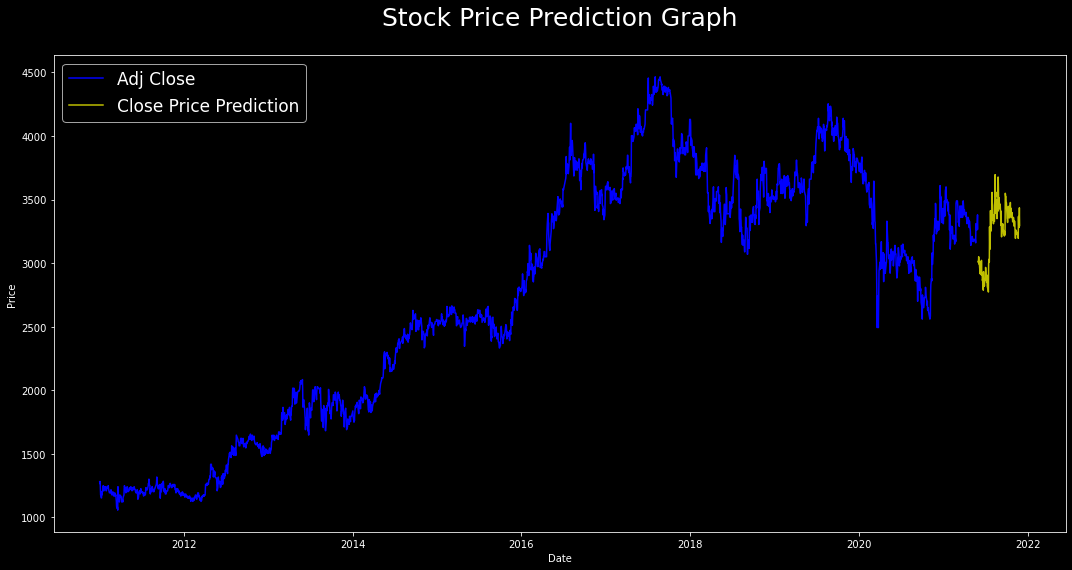

In [28]:
plt.figure(figsize=(15,8))
plt.plot(df['Adj Close'], color='b')
plt.plot(df['Close Price Prediction'], color='y')
plt.legend(['Adj Close', 'Close Price Prediction'], loc=0, prop={'size' : 17})
print(' ')
plt.title('Stock Price Prediction Graph', fontsize=25, loc='center', y=1.05)
plt.xlabel('Date')
plt.ylabel('Price')
plt.tight_layout()
plt.show()